# Regressão Linear Python
#### Aplicando o algoritmo de regressão linear em uma base de dados de plano de saúde.

![regressao-linear-exemplo](Imagens/regressao-linear-exemplo.png)

### Pré-processamento de dados

In [1]:
# importando a biblioteca pandas do python
import pandas as pd

In [2]:
# importando a base de dados no objeto 'dataframe'
dataframe = pd.read_csv('plano_saude.csv', encoding = 'utf-8', sep = ',')

In [4]:
# visualizando os dados
print(dataframe)

   idade  custo
0     18    871
1     23   1132
2     28   1242
3     33   1356
4     38   1488
5     43   1638
6     48   2130
7     53   2454
8     58   3066
9     63   4090


In [5]:
# visualizanod as dimensões dos dados
print(dataframe.shape)

(10, 2)


> A base de dados relaciona a idade do usuário com o preço a ser pago no plano de saúde.

In [37]:
# separando as variáveis x e y da base de dados
x = dataframe.iloc[:, 0].values
y = dataframe.iloc[:, 1].values

In [8]:
# visualizando as variáveis
print(x)
print(y)

[18 23 28 33 38 43 48 53 58 63]
[ 871 1132 1242 1356 1488 1638 2130 2454 3066 4090]


Observe que elas estão armazenadas em um array do tipo linha. Para conseguirmos usar o algoritmo, devemos ter arrays do tipo coluna representando as variáveis **x**.

In [43]:
# transformando em um array do tipo coluna
x = x.reshape(-1, 1)

In [10]:
# visualizando a variável x
print(x)

[[18]
 [23]
 [28]
 [33]
 [38]
 [43]
 [48]
 [53]
 [58]
 [63]]


### Algoritmo Regressão Linear

In [11]:
# importando a biblioteca numpy do python
import numpy as np

In [16]:
# visualizando a correlação dos dados
correlacao = np.corrcoef(x,y)
print(correlacao)

[[1.         0.93091958]
 [0.93091958 1.        ]]


Observe que a correlação indica o quão linear estão destribuidos os dados. Nesse exemplo, obtivemos uma correlação de **93.09%**, indicando que o algoritmo de regressão linear terá bons resultados com essa base de dados.

In [20]:
# importando a biblioteca sklearn do python
from sklearn.linear_model import LinearRegression
# 'LinearRegression' é responsável por aplicar o algoritmo de regressão linear

In [23]:
# criando o regressor 'regressao'
regressao = LinearRegression()

In [24]:
# visualizando o classificador
regressao

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
#realizando o treinamento com as variáveis x e y
regressao.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# visualizando o valor da constante b1
regressao.coef_

array([61.86787879])

In [27]:
# visualizando o valor do coeficiente b0
regressao.intercept_

-558.9490909090912

### Visualizando o Gráfico

A melhor forma de se visualizar um algoritmo de regressão linear é através de gráficos. Abaixo, é possível visualizar o gráfico para o exemplo feito acima.

In [41]:
# importando a biblioteca matplotlib do python
import matplotlib.pyplot as plt
%matplotlib inline

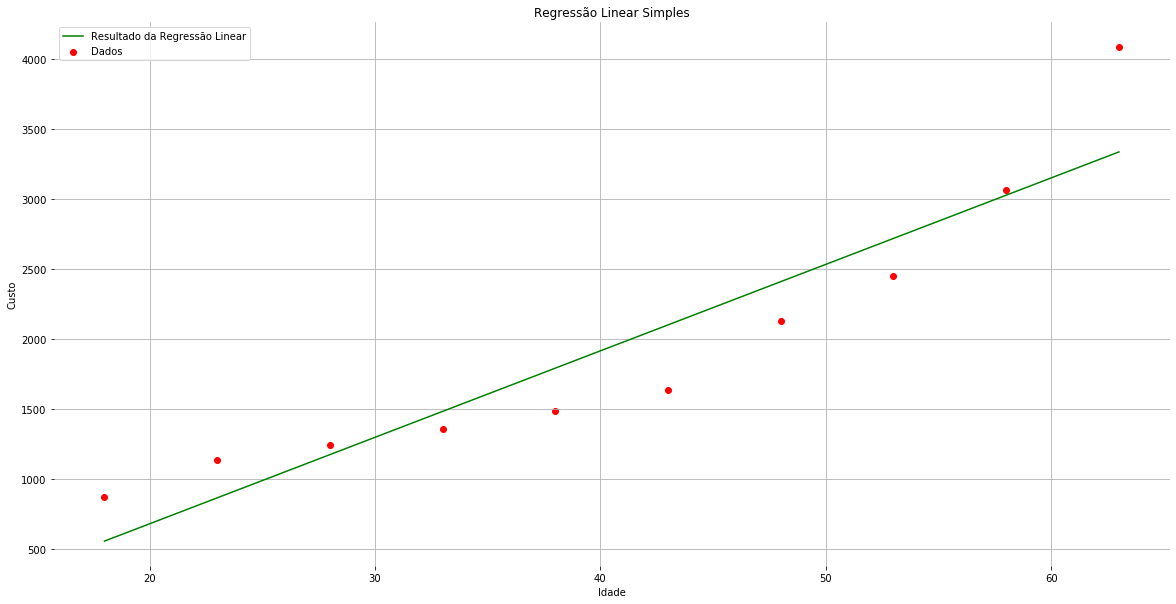

In [45]:
# definindo a dimensão do gráfico
plt.figure(figsize = (20,10))

# plotando os dados x e y no gráfico
plt.scatter(x, y, color = 'red', label = 'Dados')

# plotando a reta obtida pelo algoritmo
plt.plot(x, regressao.predict(x), color = 'green', label = 'Resultado da Regressão Linear')

# colocando um título no gráfico
plt.title('Regressão Linear Simples')

# colocando um título no eixo x
plt.xlabel('Idade')

# colocando um título no eixo y
plt.ylabel('Custo')

# colocando a legenda no gráfico
plt.legend()

# colocando uma grade ao gráfico
plt.grid(True)

# removendo a moldura do gráfico
plt.box(False)

### Predição

Vamos realizar a predição para uma pessoa de 40 anos.

In [52]:
# realizando a predição do algoritmo
previsao = regressao.predict([[40]])
# imprimindo na saída de dados a previsão do algoritmo para uma pessoa de 40 anos de idade
print(previsao)

[1915.76606061]


Além disso, sabendo do modelo matemático do algoritmo (equação da reta), podemos realizar a predição da seguinte forma:

In [53]:
# construindo a equação da reta para prever o valor de y
print(regressao.intercept_ + regressao.coef_ * 40)

[1915.76606061]


### Visualizando graficamente o erro do algoritmo

In [55]:
# importando a biblioteca yellowbrick do python
from yellowbrick.regressor import ResidualsPlot

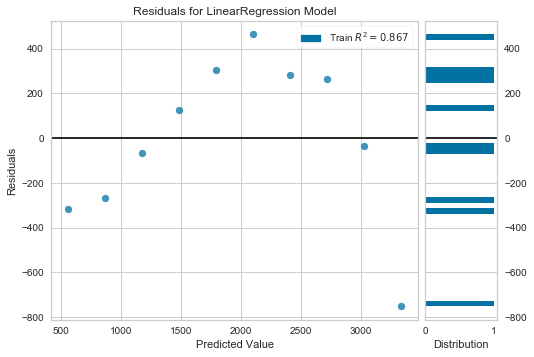

In [59]:
# configurando o objeto 'visualizador'
visualizador  = ResidualsPlot(regressao)
# passando as variaveis x e y para o 'visualizador'
visualizador.fit(x, y)
# obtendo a porcentagem de adaptação dos dados em relação ao modelo feito
visualizador.poof()

Observe que quanto mais distante um dado estiver da reta, a previsão a ser feita que esteja na vizinhança desse dado tende a ser menos precisa, e quanto mais próximo um dado estiver da reta, a previsão que esteja na vizinhança desse dado tende a ser mais precisa.

A porcentagem de adaptação em relação ao modelo feito foi de 86.7%.

In [61]:
# obtendo a porcentagem de adaptação dos dados em relação ao modelo feito
score = regressao.score(x, y)
#visualizando a porcentagem obtida na saída de dados
print(score)

0.8666112727879174
